In [2]:
import pandas as pd
from geofunctions import utils
import geopandas as gpd

In [4]:
df_2019 = pd.read_csv(
    utils.get_path("raw","statistics","transport_validations/tikufim_2019.csv"), sep= '|'
)

In [5]:
df_2019.head()

,OperatorId,operator_nm,ClusterId,cluster_nm,OperatorLineId,OfficeLineId,Direction,hour_a,year_key,month_key,...,22,23,24,25,26,27,28,29,30,31
0,2,רכבת ישראל,50,רכבת ישראל,-1,0,0,0,2019,1,...,544.0,548.0,122.0,752.0,3.0,355.0,531.0,406.0,478.0,708.0
1,2,רכבת ישראל,50,רכבת ישראל,-1,0,0,0,2019,2,...,630.0,2.0,367.0,562.0,532.0,752.0,551.0,NaN,NaN,NaN
2,2,רכבת ישראל,50,רכבת ישראל,-1,0,0,0,2019,3,...,1736.0,4.0,406.0,523.0,504.0,147.0,213.0,261.0,6.0,494.0
3,2,רכבת ישראל,50,רכבת ישראל,-1,0,0,0,2019,4,...,831.0,958.0,885.0,757.0,1.0,1.0,764.0,740.0,741.0,NaN
4,2,רכבת ישראל,50,רכבת ישראל,-1,0,0,0,2019,5,...,641.0,1574.0,766.0,5.0,683.0,612.0,772.0,924.0,763.0,830.0


In [10]:
df_2019.describe()

,OperatorId,ClusterId,OperatorLineId,OfficeLineId,Direction,hour_a,year_key,month_key,1,2,...,22,23,24,25,26,27,28,29,30,31
count,914880.000000,914880.000000,914880.000000,914880.000000,914880.000000,914880.000000,914880.0,914880.000000,444726.000000,461117.000000,...,488548.000000,456466.000000,538969.000000,491883.000000,450945.000000,471780.000000,501909.000000,444942.000000,397667.000000,288644.000000
mean,12.016917,135.070452,175.138385,21467.458916,1.697253,13.109110,2019.0,6.542578,61.040155,61.798218,...,59.992259,60.403804,62.680009,60.712417,61.070104,61.639569,62.498298,60.876276,62.200955,61.570208
std,9.136254,49.472828,235.393750,16693.183334,1.127232,5.645094,0.0,3.463927,324.359290,334.595975,...,332.013824,330.741504,347.578669,326.442837,335.599968,332.859554,335.057955,326.668999,352.679251,342.947568
min,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,2019.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,100.000000,18.000000,11210.000000,1.000000,9.000000,2019.0,4.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
50%,14.000000,128.000000,63.000000,15170.000000,1.000000,13.000000,2019.0,7.000000,21.000000,21.000000,...,21.000000,21.000000,22.000000,21.000000,21.000000,21.000000,22.000000,21.000000,21.000000,21.000000
75%,18.000000,176.000000,265.000000,26052.000000,2.000000,18.000000,2019.0,10.000000,60.000000,60.000000,...,59.000000,59.000000,61.000000,60.000000,59.000000,60.000000,61.000000,60.000000,60.000000,60.000000
max,98.000000,247.000000,999.000000,999999.000000,9.000000,23.000000,2019.0,12.000000,41904.000000,39146.000000,...,39264.000000,38451.000000,42018.000000,35552.000000,40238.000000,40134.000000,39300.000000,37431.000000,38183.000000,36828.000000


In [6]:
df_2019['cluster_nm'].value_counts()

cluster_nm
הגליל                           68332
העמקים                          48206
אגד ארצי בין עירוני.בן מחוזי    46680
ירושלים עירוני                  45403
חשמונאים                        45396
                                ...  
נהריה-צפת                          23
221-ישיר בש - ת"א"                  2
נתניה - תל אביב                     1
עפולה - בית שאן                     1
אגד המרכז                           1
Name: count, Length: 78, dtype: int64

In [9]:
df_2019[df_2019['cluster_nm'] =='נתניה - תל אביב']

,OperatorId,operator_nm,ClusterId,cluster_nm,OperatorLineId,OfficeLineId,Direction,hour_a,year_key,month_key,...,22,23,24,25,26,27,28,29,30,31
512663,14,נתיב אקספרס,160,נתניה - תל אביב,600,10600,1,20,2019,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_2019['month_sum']= df_2019[df_2019.columns[-31:]].fillna(0).sum(axis=1)

In [ ]:
df_2019.groupby(['month_key','year_key'])['month_sum'].sum()

month_key  year_key
1          2019        79811782.0
2          2019        71499831.0
3          2019        76661206.0
4          2019        68124535.0
5          2019        78508004.0
6          2019        74087981.0
7          2019        78811578.0
8          2019        69618613.0
9          2019        75572716.0
10         2019        63653992.0
11         2019        77274227.0
12         2019        82079605.0
Name: month_sum, dtype: float64

In [3]:
df_stat_list = []
for year in ['2019','2020','2021','2022','2023']:
    df_2019 = pd.read_csv(
        utils.get_path("raw","statistics",f"transport_validations/tikufim_{year}.csv"), sep= '|'
    )
    df_2019['month_sum']= df_2019[df_2019.columns[-31:]].fillna(0).sum(axis=1)
    df_2019_stat = df_2019.groupby(['month_key','year_key'])['month_sum'].sum().to_frame()
    df_stat_list.append(df_2019_stat)


In [4]:
df_stat = pd.concat(df_stat_list)

In [18]:
df_stat.head()

,,month_sum
month_key,year_key,
1,2019,79811782.0
2,2019,71499831.0
3,2019,76661206.0
4,2019,68124535.0
5,2019,78508004.0


In [6]:
df_stat =df_stat.reset_index()

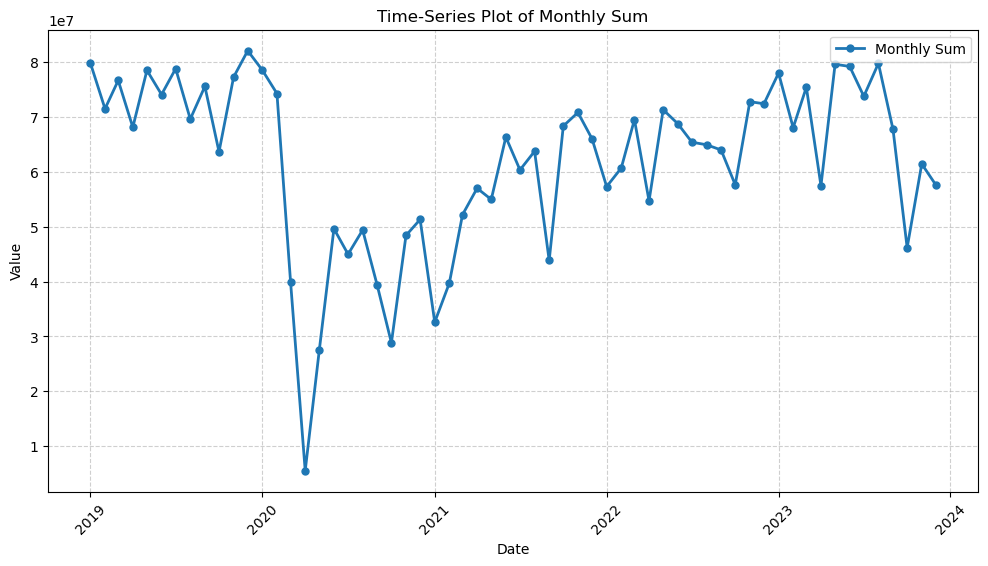

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure df_stat contains the correct columns
df_stat['date'] = pd.to_datetime(df_stat['year_key'].astype(str) + '-' + df_stat['month_key'].astype(str))
df_stat.set_index('date', inplace=True)

# Sort values to ensure proper chronological order
df_stat.sort_index(inplace=True)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(df_stat.index, df_stat['month_sum'], marker='o', linestyle='-', linewidth=2, markersize=5, label='Monthly Sum')

# Formatting the plot
plt.xlabel("Date")
plt.ylabel("Value")
plt.title("Time-Series Plot of Monthly Sum")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()


In [16]:
df_stat['month'] = df_stat['year_key'].astype(str)+df_stat['month_key'].astype(str)

In [27]:
# Convert df1['month'] to YYYY-MM format
df_stat['month'] = df_stat.reset_index()['date'].dt.strftime('%Y-%m').values



## Add remote work data

In [13]:
df_rw = pd.read_csv("../data/diagrams_data/remote_work_statistic.csv")

In [21]:
# Convert df2['month'] to YYYY-MM format
df_rw['month'] = df_rw['month'].astype(str).str[:4] + '-' + df_rw['month'].astype(str).str[4:]


In [85]:
df_merged = df_stat.merge(df_rw, on = 'month')

In [86]:
df_merged[['month_sum','flag_remote_work_smoothed_max_thresh','remote_work_share_min_work','flag_remote_work_smoothed_max']].corr()['month_sum']

month_sum                               1.000000
flag_remote_work_smoothed_max_thresh   -0.617123
remote_work_share_min_work             -0.617094
flag_remote_work_smoothed_max          -0.662902
Name: month_sum, dtype: float64

In [87]:
df_merged['reverse_remote_work'] = 1-df_merged['flag_remote_work_smoothed_max_thresh']

In [88]:
df_merged['date'] = df_merged['month']

In [89]:
df_merged['month_sum_norm'] = df_merged['month_sum']/79811782.0

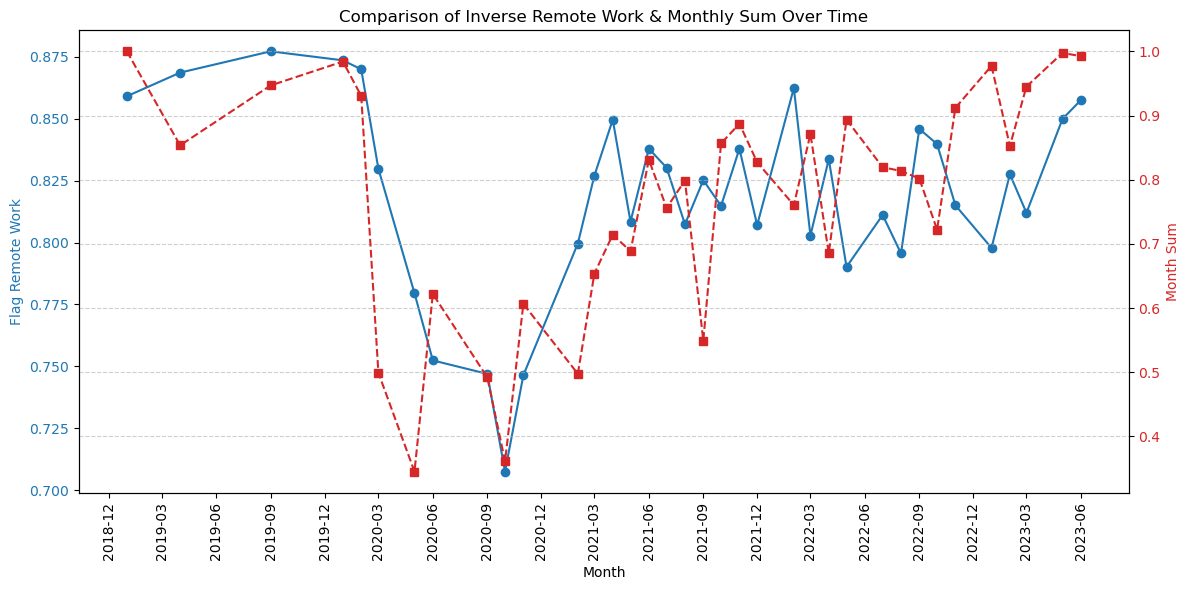

In [90]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'month' column is datetime and set as index
df_merged['month'] = pd.to_datetime(df_merged['month'])
df_merged.set_index('month', inplace=True)

# Create figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# First Y-axis (Primary)
color1 = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Flag Remote Work', color=color1)
ax1.plot(df_merged.index, df_merged['reverse_remote_work'], 
         color=color1, marker='o', linestyle='-', label='Inverse Remote Work')
ax1.tick_params(axis='y', labelcolor=color1)

# Format X-axis to show 'YYYY-MM'
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months
plt.xticks(rotation=90)

# Second Y-axis (Secondary)
ax2 = ax1.twinx()  
color2 = 'tab:red'
ax2.set_ylabel('Month Sum', color=color2)
ax2.plot(df_merged.index, df_merged['month_sum_norm'], 
         color=color2, marker='s', linestyle='--', label='Month Sum')
ax2.tick_params(axis='y', labelcolor=color2)

# Title and grid
plt.title("Comparison of Inverse Remote Work & Monthly Sum Over Time")
fig.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()



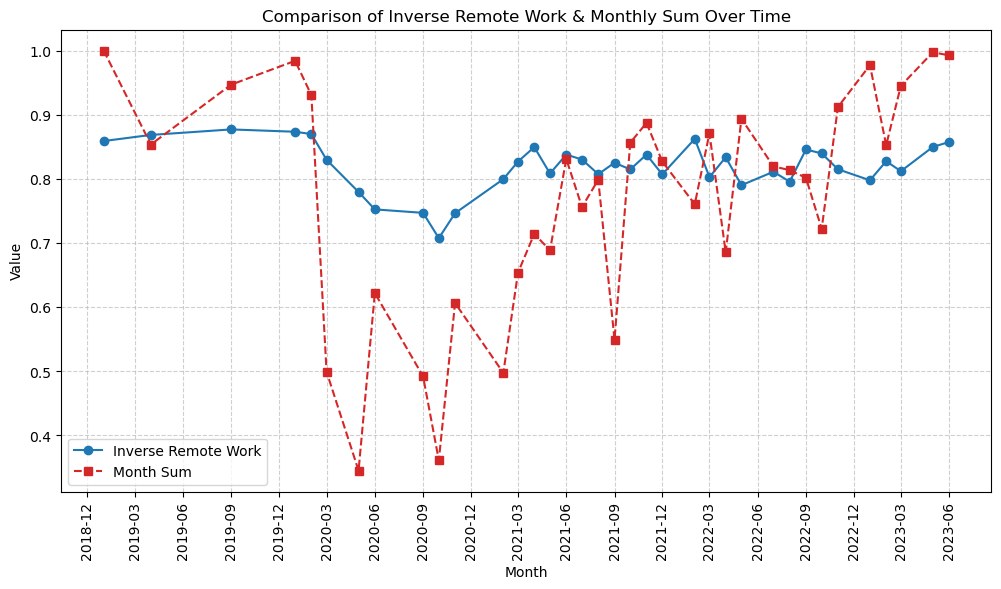

In [92]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'month' column is datetime and set as index


# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot both lines on the same y-axis
ax.plot(df_merged.index, df_merged['reverse_remote_work'], 
        color='tab:blue', marker='o', linestyle='-', label='Inverse Remote Work')

ax.plot(df_merged.index, df_merged['month_sum_norm'], 
        color='tab:red', marker='s', linestyle='--', label='Month Sum')

# Labels and formatting
ax.set_xlabel("Month")
ax.set_ylabel("Value")
ax.set_title("Comparison of Inverse Remote Work & Monthly Sum Over Time")

# Format X-axis to show 'YYYY-MM'
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))  # Show every 3 months
plt.xticks(rotation=90)

# Add legend and grid
ax.legend()
ax.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()
